Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Data preparation

In [1]:
import numpy as np
import pandas as pd
import sklearn
import math
import time

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from IPython.display import display

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


from sklearn.metrics import f1_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#create dataframe and explore
df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/car_data.csv')

In [3]:
df.head(100)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,25/03/2016 18:44,3850,sedan,2003,manual,131,passat,150000,5,gasoline,volkswagen,no,25/03/2016 00:00,0,30459,07/04/2016 00:16
96,26/03/2016 15:38,6450,bus,2008,manual,84,transporter,150000,12,NaN,volkswagen,no,26/03/2016 00:00,0,44623,06/04/2016 03:17
97,01/04/2016 12:45,1700,small,1999,auto,102,a_klasse,125000,11,petrol,mercedes_benz,no,01/04/2016 00:00,0,12305,01/04/2016 12:45
98,11/03/2016 19:00,4290,bus,2008,manual,0,combo,150000,2,gasoline,opel,no,11/03/2016 00:00,0,23568,05/04/2016 22:45


In [4]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
#make columns lowercase
df.columns = [col.lower() for col in df.columns]

In [7]:
#rename columns 
df = df.rename(columns={'datecrawled': 'date_crawled', 'vehicletype': 'vehicle_type', 'registrationyear':'registration_year', 'registrationmonth': 'registration_month', 'fueltype': 'fuel_type','notrepaired':'not_repaired','datecreated':'date_created','numberofpictures':'number_of_pictures', 'postalcode':'postal_code', 'lastseen':'last_seen'})

In [8]:
#fix dates 
df[['date_crawled', 'date_created']] = df[['date_crawled','date_created']].apply(pd.to_datetime)

In [9]:
df['last_seen'] = pd.to_datetime(df['last_seen'], format='%d/%m/%Y %H:%M')

In [10]:
#replace petrol with gasoline
df['fuel_type'] = df['fuel_type'].replace('petrol', 'gasoline')

In [11]:
#check for duplicates
df.duplicated().sum()

262

In [12]:
#drop Nan data rows
df = df.dropna(subset=['vehicle_type','fuel_type', 'gearbox', 'fuel_type','model'])

In [13]:
#replace Nan on not_repaired with 'other'
df['not_repaired'].fillna('other', inplace=True)

In [14]:
#drop number_of Pictures since all data is the same
df = df.drop(columns='number_of_pictures')

In [15]:
#drop where power = 0 
df = df[df['power'] != 0]
df =df.drop(df[df['power'] > 1000].index) 

In [16]:
df =df.drop(df[df['registration_year'] < 1950].index) 

In [17]:
df.head(50)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,postal_code,last_seen
2,2016-03-14 12:52:00,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,other,2016-03-14,90480,2016-04-05 12:47:00
3,2016-03-17 16:54:00,1500,small,2001,manual,75,golf,150000,6,gasoline,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:00
4,2016-03-31 17:25:00,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,60437,2016-04-06 10:17:00
5,2016-04-04 17:36:00,650,sedan,1995,manual,102,3er,150000,10,gasoline,bmw,yes,2016-04-04,33775,2016-04-06 19:17:00
6,2016-01-04 20:48:00,2200,convertible,2004,manual,109,2_reihe,150000,8,gasoline,peugeot,no,2016-01-04,67112,2016-04-05 18:18:00
7,2016-03-21 18:54:00,0,sedan,1980,manual,50,other,40000,7,gasoline,volkswagen,no,2016-03-21,19348,2016-03-25 16:47:00
8,2016-04-04 23:42:00,14500,bus,2014,manual,125,c_max,30000,8,gasoline,ford,other,2016-04-04,94505,2016-04-04 23:42:00
10,2016-03-26 19:54:00,2000,sedan,2004,manual,105,3_reihe,150000,12,gasoline,mazda,no,2016-03-26,96224,2016-04-06 10:45:00
11,2016-07-04 10:06:00,2799,wagon,2005,manual,140,passat,150000,12,gasoline,volkswagen,yes,2016-07-04,57290,2016-04-07 10:25:00
12,2016-03-15 22:49:00,999,wagon,1995,manual,115,passat,150000,11,gasoline,volkswagen,other,2016-03-15,37269,2016-04-01 13:16:00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267830 entries, 2 to 354368
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        267830 non-null  datetime64[ns]
 1   price               267830 non-null  int64         
 2   vehicle_type        267830 non-null  object        
 3   registration_year   267830 non-null  int64         
 4   gearbox             267830 non-null  object        
 5   power               267830 non-null  int64         
 6   model               267830 non-null  object        
 7   mileage             267830 non-null  int64         
 8   registration_month  267830 non-null  int64         
 9   fuel_type           267830 non-null  object        
 10  brand               267830 non-null  object        
 11  not_repaired        267830 non-null  object        
 12  date_created        267830 non-null  datetime64[ns]
 13  postal_code         267830 no

## Model training

In [19]:
#split df into features and target, drop column with data that does not   
features = df.drop(['price','date_crawled','last_seen','date_created'], axis= 1)
target = df['price']

In [20]:
#OHE processing on categorical data
features = pd.get_dummies(features, columns=['vehicle_type','gearbox','model','fuel_type','brand','not_repaired'], drop_first=True)

In [21]:
#split data for training and testing and validation
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345)


In [22]:
#Scaling on the features data that is non categorical 
numeric = ['registration_year','power', 'mileage']
scaler = StandardScaler()

scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

In [23]:
#check on the size of data sets to confirm they are in 3:1:1 ratio 
print(features_train.shape)
print(target_train.shape)

print(features_test.shape)
print(target_test.shape)

print(features_valid.shape)
print(target_valid.shape)

print('Ratio:', target_train.shape[0]/len(df),target_test.shape[0]/len(df),target_valid.shape[0]/len(df))

(160698, 306)
(160698,)
(53566, 306)
(53566,)
(53566, 306)
(53566,)
Ratio: 0.6 0.2 0.2


<b>Linear Regression Model (as baseline)

In [26]:
LR_model = LinearRegression()
LR_model.fit(features_train, target_train)  # train model on training set

start_time = time.time()
predictions= LR_model.predict(features_test)
end_time = time.time()
execution_time = end_time - start_time

rmse = (mean_squared_error(target_test, predictions))**0.5

print("Linear Regressor Model RMSE:", rmse)
print("Run Time:",execution_time )

Linear Regressor Model RMSE: 2572.9205438194217
Run Time: 0.1975390911102295


<b>Random Forest Regressor

In [27]:
best_rmse = 0
best_depth = 0
best_est = 0
for est in range(10,51,10):
    for depth in range(1,6):
        model2 = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model2.fit(features_train,target_train)
        predictions2 = model2.predict(features_valid)
        rmse = (mean_squared_error(target_valid, predictions))**0.5
        
        if rmse > best_rmse:
            best_RF_model = model2
            best_rmse = rmse
            best_depth = depth
            best_est = est

start_time = time.time()
predictions3 = best_RF_model.predict(features_test)
end_time = time.time()
execution_time = end_time - start_time

rmse = (mean_squared_error(target_test, predictions))**0.5
print(f"Root Mean Squared Error of the Random Forest Model with (n_estimators: {best_est}, max_depth :{best_depth}):", rmse)            
print("Run Time:",execution_time )

Root Mean Squared Error of the Random Forest Model with (n_estimators: 10, max_depth :1): 2572.9205438194217
Run Time: 0.07436490058898926


In [28]:
#create new datasets that are not scaled or ohe
# Define features and target variable
features_lgb = df.drop(['price','date_crawled','last_seen','date_created'], axis=1)
target_lgb = df['price']


#create label encoder and fit data
label_encoder = LabelEncoder()

for feature in ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']:
    features_lgb[feature] = label_encoder.fit_transform(features_lgb[feature])
    
    
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    features_lgb, target_lgb, test_size=0.2, random_state=12345)

# Define LightGBM parameters
params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    'metric': 'rmse',  # Root Mean Squared Error
    "num_leaves": 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Define categorical features
categorical_features = ['vehicle_type','gearbox','model','fuel_type','brand','not_repaired']

# Initialize LightGBM dataset
train_data = lgb.Dataset(x_train, label=y_train, categorical_feature=categorical_features)
test_data = lgb.Dataset(x_test, label=y_test, categorical_feature=categorical_features)



<b>LightGBM Model

In [29]:
# LightGBM Model
lgb_model = lgb.train(
    params, train_data, num_boost_round=100, valid_sets=test_data,  callbacks=[lgb.early_stopping(stopping_rounds=5)]
)

# Make predictions
start_time = time.time()
predictions = lgb_model.predict(x_test, num_iteration=lgb_model.best_iteration)
end_time = time.time()
execution_time = end_time - start_time

#calculate rmse
rmse = mean_squared_error(y_test, predictions) ** 0.5

print("Root Mean Squared Error:", rmse)
print("Run Time:",execution_time )

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1698.81
Root Mean Squared Error: 1698.810815135498
Run Time: 0.6140270233154297


<b>XGBoost Model

In [30]:
# XGBoost 
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.05, random_state=12345)

# Train the model
xgb_model.fit(x_train, y_train)

# Make predictions
start_time = time.time()
predictions = xgb_model.predict(x_test)
end_time = time.time()
execution_time = end_time - start_time

# Evaluate model performance
rmse = mean_squared_error(y_test, predictions) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Run Time:",execution_time )

Root Mean Squared Error: 1799.3820949719332
Run Time: 0.25813984870910645


## Model analysis

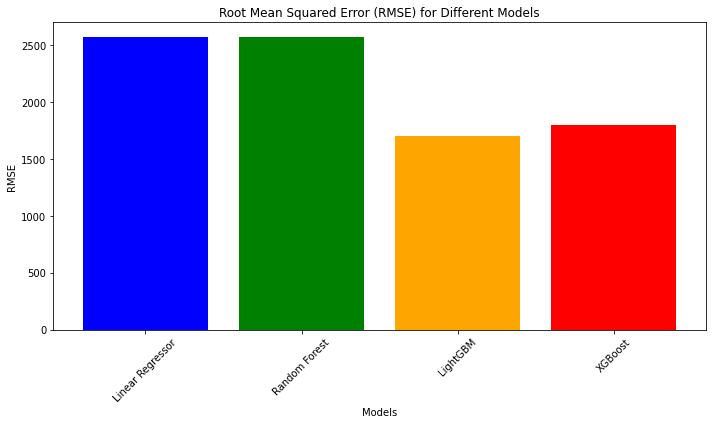

In [34]:
models = ['Linear Regressor', 'Random Forest', 'LightGBM', 'XGBoost']
rmse_values = [2572.92, 2572.92, 1698.81, 1799.38]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) for Different Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

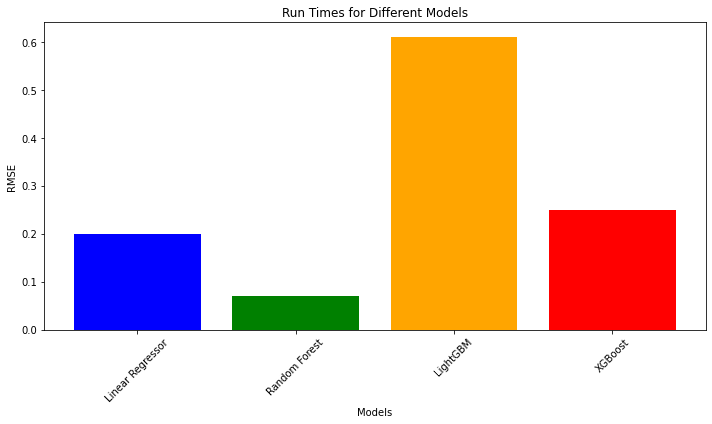

In [33]:
models = ['Linear Regressor', 'Random Forest', 'LightGBM', 'XGBoost']
rmse_values = [0.20, 0.07, 0.61, 0.25]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Time')
plt.title('Run Times for Different Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Our Random Forest Model shows promising results performing as well as our baseline Linear Regressor Model with a score of 2572.92 and having the fastest overall speed of 0.07. Out LightGBM had the best overall rmse score with 1075.23 where lower scores equal bteer performance. 

Linear Regressor Model 
RMSE: 2572.92
Run Time: 0.20

Random Forest Model with (n_estimators: 10, max_depth :1)
RMSE: 2572.92
Run Time: 0.07

LightGBM Model (Lowest RMS Model): 
RMSE: 1698.81
Run Time: 0.61

XGBoost Model
RMSE: 1799.38
Run Time: 0.25
    

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed